In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster");
import plotly.express as px

import statsmodels.api as sm
from scipy.stats import norm
import time
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
#Loading the CSV data into pandas
cardiac_data = pd.read_csv("cardiac.csv")

In [3]:
cardiac_data

,caseno,age,weight,gender,fitness_score,cardiac_condition
0,1,37,70.47,Male,55.79,Absent
1,2,73,50.34,Female,35.00,Absent
2,3,46,87.65,Male,42.93,Present
3,4,36,89.80,Female,28.30,Present
4,5,34,103.02,Male,40.56,Absent
...,...,...,...,...,...,...
95,96,42,111.98,Male,33.73,Present
96,97,43,88.07,Male,49.22,Present
97,98,45,94.07,Male,41.97,Present
98,99,58,97.46,Male,35.20,Present


In [4]:
cardiac_data.columns

Index(['caseno', 'age', 'weight', 'gender', 'fitness_score',
       'cardiac_condition'],
      dtype='object')

In [5]:
#getting the information related to datasets
cardiac_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   caseno             100 non-null    int64  
 1   age                100 non-null    int64  
 2   weight             100 non-null    float64
 3   gender             100 non-null    object 
 4   fitness_score      100 non-null    float64
 5   cardiac_condition  100 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


In [6]:
# descriptive statistics of the dataset
cardiac_data.describe().T

,count,mean,std,min,25%,50%,75%,max
caseno,100.0,50.5000,29.011492,1.00,25.7500,50.50,75.2500,100.00
age,100.0,41.1000,9.142530,30.00,34.0000,39.00,45.2500,74.00
weight,100.0,79.6603,15.089842,50.00,69.7325,79.24,89.9125,115.42
fitness_score,100.0,43.6298,8.571306,27.35,36.5950,42.73,49.2650,62.50


## Explanatory Data Analysis

In [7]:
cardiac_data.isnull().sum()

caseno               0
age                  0
weight               0
gender               0
fitness_score        0
cardiac_condition    0
dtype: int64

There is no missing values present in a dataset

In [8]:
len(cardiac_data[cardiac_data.duplicated()])

0

There is no duplicate values in a dataset

In [9]:
cardiac_data.describe()

,caseno,age,weight,fitness_score
count,100.000000,100.00000,100.000000,100.000000
mean,50.500000,41.10000,79.660300,43.629800
std,29.011492,9.14253,15.089842,8.571306
min,1.000000,30.00000,50.000000,27.350000
25%,25.750000,34.00000,69.732500,36.595000
50%,50.500000,39.00000,79.240000,42.730000
75%,75.250000,45.25000,89.912500,49.265000
max,100.000000,74.00000,115.420000,62.500000


In [10]:
cardiac_data = cardiac_data.drop(columns = ['caseno'], axis = 1)

In [11]:
cardiac_data_df = cardiac_data.copy()

In [12]:
#storing numerical feature in separate variable 
numerical_columns_of_cardiac_data = [feature for feature in cardiac_data_df.columns if cardiac_data_df[feature].dtypes!='O']
cardiac_data_df[numerical_columns_of_cardiac_data]

,age,weight,fitness_score
0,37,70.47,55.79
1,73,50.34,35.00
2,46,87.65,42.93
3,36,89.80,28.30
4,34,103.02,40.56
...,...,...,...
95,42,111.98,33.73
96,43,88.07,49.22
97,45,94.07,41.97
98,58,97.46,35.20


In [13]:
categorical_columns_of_cardiac_data  = [feature for feature in cardiac_data_df.columns if cardiac_data_df[feature].dtypes =='O']
cardiac_data_df[categorical_columns_of_cardiac_data]

,gender,cardiac_condition
0,Male,Absent
1,Female,Absent
2,Male,Present
3,Female,Present
4,Male,Absent
...,...,...
95,Male,Present
96,Male,Present
97,Male,Present
98,Male,Present


#### 1.Univariate Analysis

In [14]:
#analysing numerical value using density plot with mean and median
def density_plot(dfr,numerical_columns_of_cardiac_data):
  graph = plt.figure(figsize = (20,30))
  for i,col in enumerate(numerical_columns_of_cardiac_data) :
    sns.set_context('poster');
    plt.subplot(12, 2, i + 1);
    sns.distplot(cardiac_data_df[col], color = '#055E85', fit = norm);
    feature = cardiac_data_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #Rose-Red Color indicate mean of data
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #Cyan indicate median of data
    plt.title(f'{col.title()}');
    plt.tight_layout();

C:\Users\nikhi\AppData\Local\Temp\ipykernel_31236\990806903.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cardiac_data_df[col], color = '#055E85', fit = norm);
C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikhi\AppData\Local\Temp\ipykernel_31236\990806903.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-l

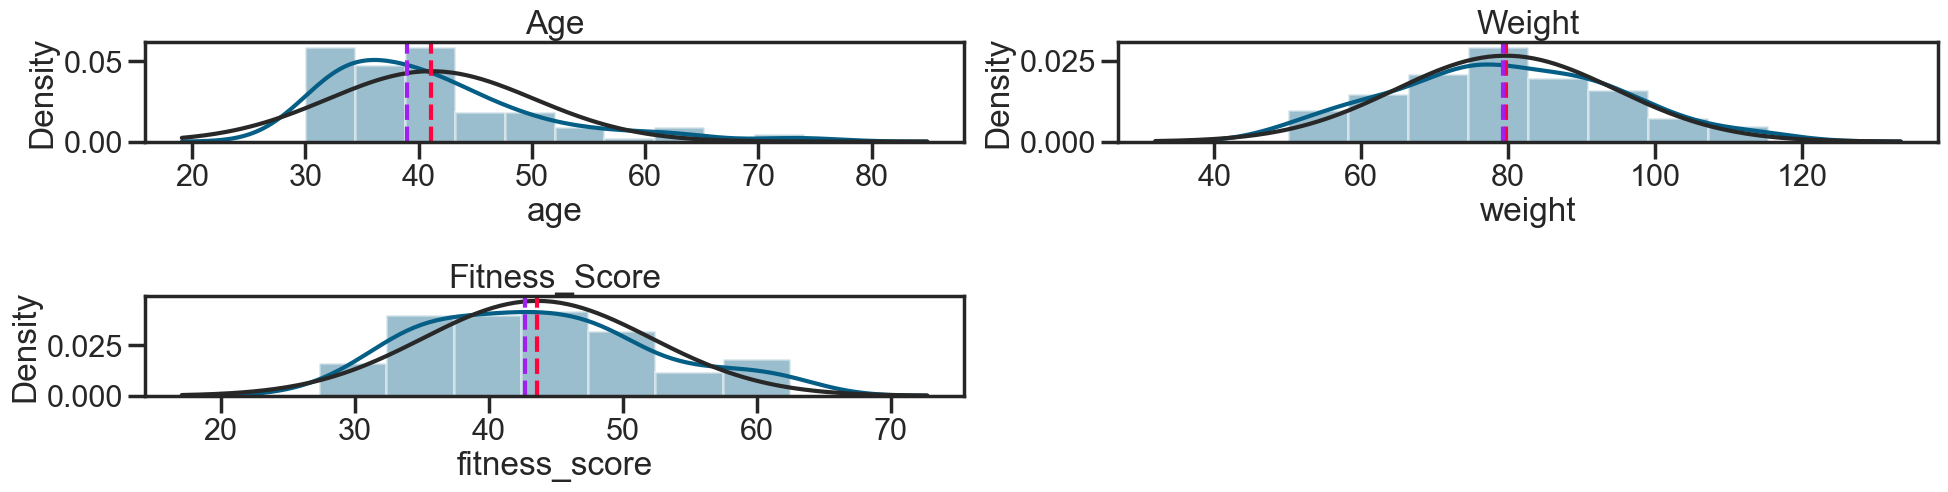

In [15]:
density_plot(cardiac_data_df,numerical_columns_of_cardiac_data)

C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


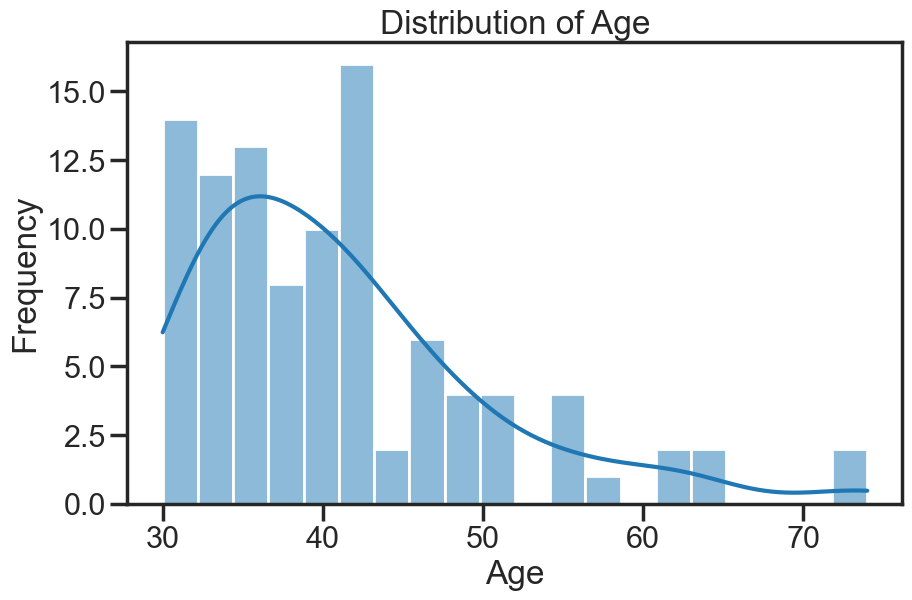

In [16]:
# Visualize the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(cardiac_data_df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

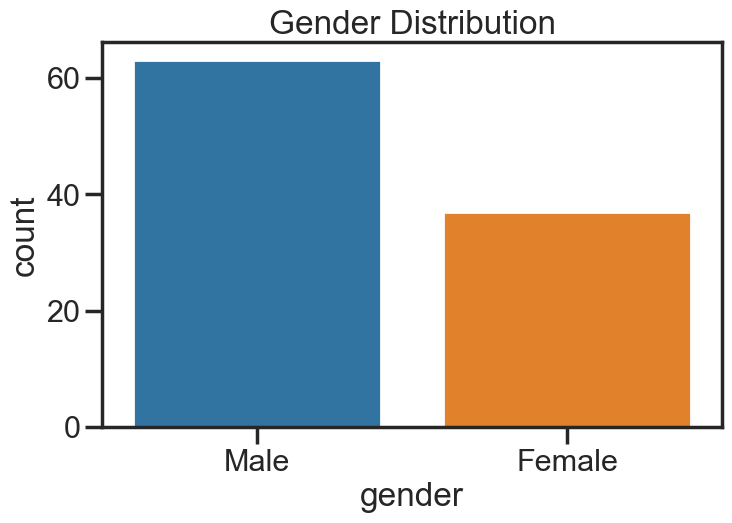

In [17]:
# Countplot for gender
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data= cardiac_data_df)
plt.title('Gender Distribution')
plt.show()

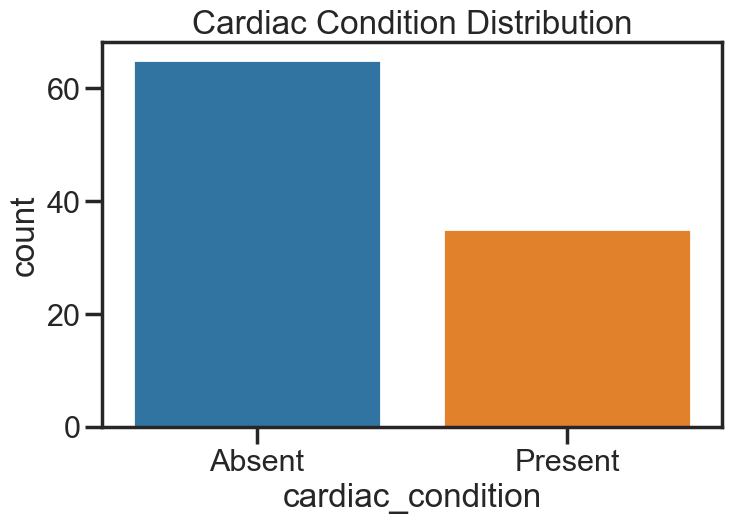

In [18]:
# Countplot for cardiac_condition
plt.figure(figsize=(8, 5))
sns.countplot(x='cardiac_condition', data=cardiac_data_df)
plt.title('Cardiac Condition Distribution')
plt.show()

C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


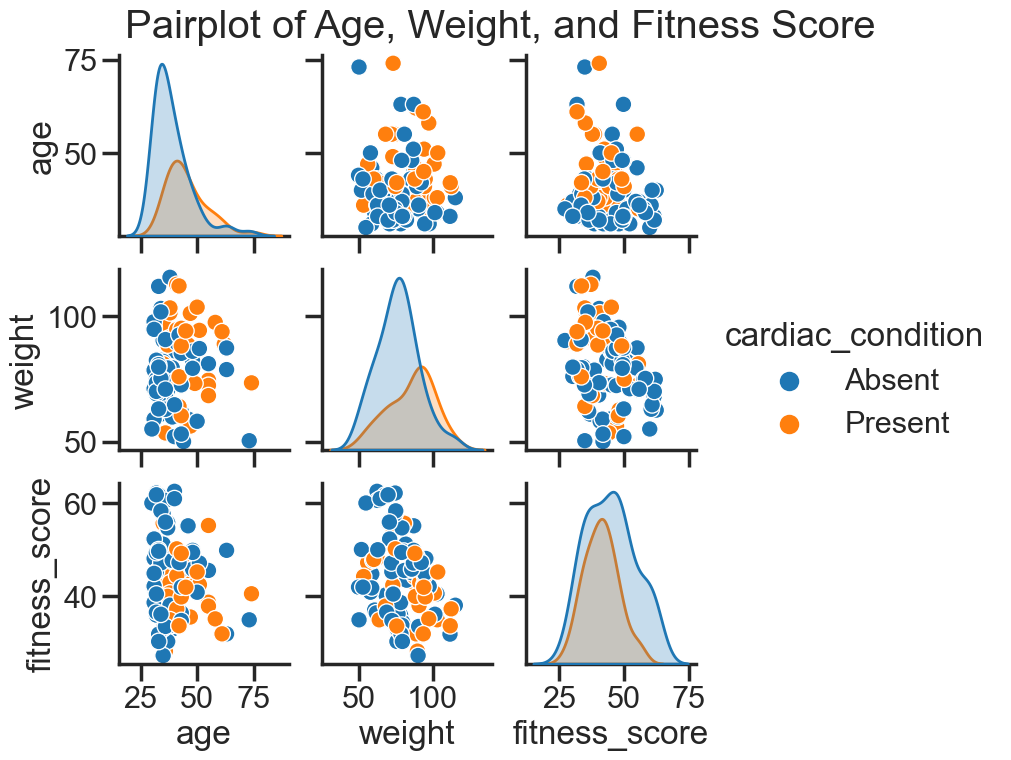

In [19]:
sns.pairplot(cardiac_data_df[['age', 'weight', 'fitness_score', 'cardiac_condition']], hue='cardiac_condition', height=2.5)
plt.suptitle('Pairplot of Age, Weight, and Fitness Score', y=1.02)
plt.show()

#### 2. Bivariate anslysis

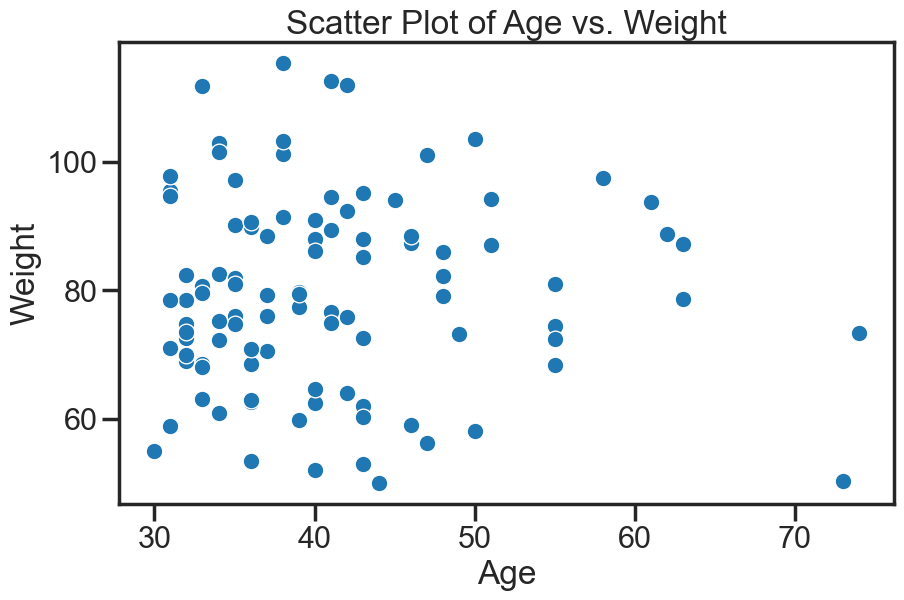

In [20]:
# Scatter plot of age vs. weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='weight', data=cardiac_data_df)
plt.title('Scatter Plot of Age vs. Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

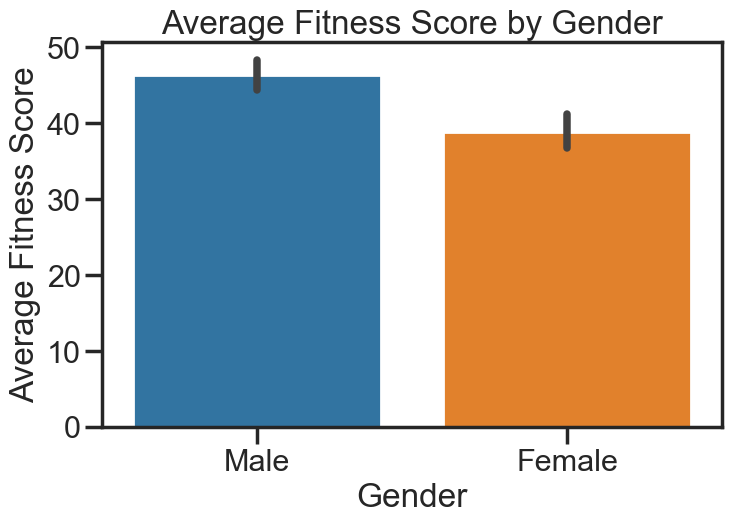

In [21]:
# Bar plot of average fitness_score by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='fitness_score', data=cardiac_data_df)
plt.title('Average Fitness Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Fitness Score')
plt.show()

#### Detecting outlier

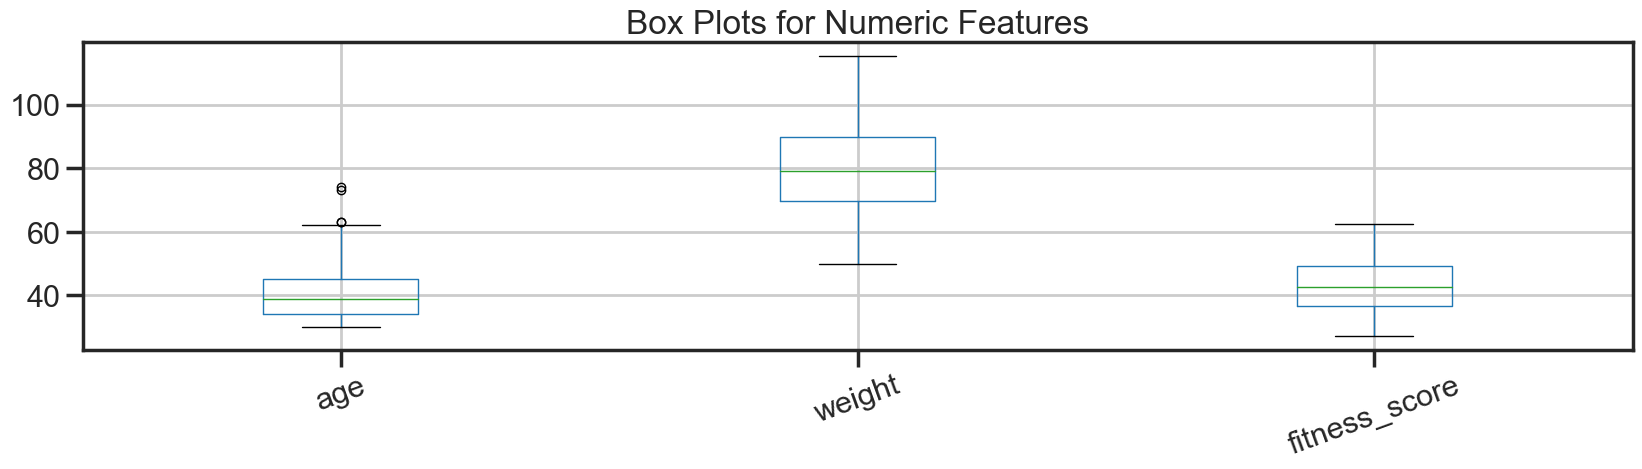

In [22]:
# Convert the list of numerical column into a DataFrame
numeric_columns_df = cardiac_data_df[numerical_columns_of_cardiac_data]

plt.figure(figsize=(20, 4))
# detecting the outlier of all the numerical column using boxplot 
numeric_columns_df.boxplot()
plt.title("Box Plots for Numeric Features")
plt.xticks(rotation=20)
plt.show()

#### Checking the Multicollinearity

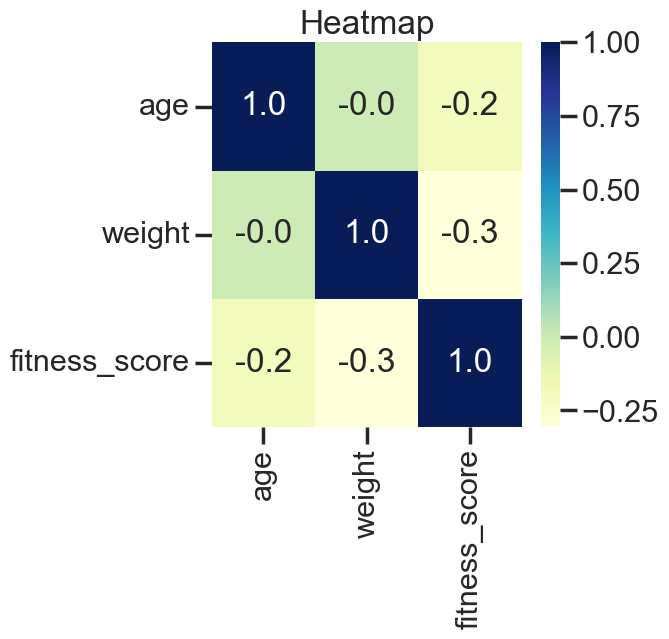

In [23]:
plt.figure(figsize=(5, 5))

# Assuming numerical_columns_of_bike is a list of numerical column names
correlation_matrix = cardiac_data_df[numerical_columns_of_cardiac_data].corr()

dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt='.1f') 
plt.title('Heatmap')
plt.show()

## Data processing

#### 1. Data Mapping

In [24]:
# Mapping dictionary
gender_mapping = {'Male': 0, 'Female': 1}

In [25]:
# Apply the mapping to the 'gender' column
cardiac_data_df['gender'] = cardiac_data_df['gender'].map(gender_mapping)

In [26]:
# Mapping dictionary
Cardiac_condition_mapping = {'Absent': 0, 'Present': 1}

cardiac_data_df['cardiac_condition'] = cardiac_data_df['cardiac_condition'].map(Cardiac_condition_mapping)

In [27]:
cardiac_data_df

,age,weight,gender,fitness_score,cardiac_condition
0,37,70.47,0,55.79,0
1,73,50.34,1,35.00,0
2,46,87.65,0,42.93,1
3,36,89.80,1,28.30,1
4,34,103.02,0,40.56,0
...,...,...,...,...,...
95,42,111.98,0,33.73,1
96,43,88.07,0,49.22,1
97,45,94.07,0,41.97,1
98,58,97.46,0,35.20,1


#### 2. Spliiting the Datasets into train and test

In [28]:
# setting up the random seed based on student number, this function is used to set the seed for the random number
student_number = 22210369
np.random.seed(student_number)

In [29]:
X= cardiac_data_df.drop(['cardiac_condition'], axis = 1)
Y= cardiac_data_df['cardiac_condition']

In [30]:
# splitting the dataset into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=student_number)

In [31]:
X_train

,age,weight,gender,fitness_score
96,43,88.07,0,49.22
73,32,82.41,0,49.40
17,40,86.13,0,45.06
56,31,71.03,0,52.30
63,31,94.68,0,44.94
...,...,...,...,...
71,40,64.65,0,60.92
34,50,58.07,0,40.90
27,48,82.16,1,49.87
30,49,73.14,1,42.42


In [32]:
X_test

,age,weight,gender,fitness_score
86,63,87.28,0,49.87
29,31,95.51,0,48.13
68,32,73.44,1,40.52
13,46,58.97,1,44.81
89,43,53.00,1,42.00
53,35,81.91,1,51.20
42,31,97.75,0,42.20
67,30,55.00,1,60.00
64,38,103.23,0,35.01
35,35,90.25,1,27.35


#### 3. Data Modelling

In [33]:
model1 = sm.Logit(Y_train,sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.531033
         Iterations 6


In [34]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:      cardiac_condition   No. Observations:                   75
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                            4
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                  0.2110
Time:                        23:44:54   Log-Likelihood:                -39.827
converged:                       True   LL-Null:                       -50.476
Covariance Type:            nonrobust   LLR p-value:                 0.0002765
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.9340      4.573     -0.642      0.521     -11.898       6.030
age               0.0787      0.034      2.315      0.021       0.012       0.145
weight            0.0351      0.027     

In [35]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      cardiac_condition   No. Observations:                   75
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                            4
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                  0.2110
Time:                        23:44:54   Log-Likelihood:                -39.827
converged:                       True   LL-Null:                       -50.476
Covariance Type:            nonrobust   LLR p-value:                 0.0002765
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.9340      4.573     -0.642      0.521     -11.898       6.030
age               0.0787      0.034      2.315      0.021       0.012       0.145
weight            0.0351      0.027      1.288      0.198      -0.018       0.088
gender           -1.2579      0.946     -1.330      0.184      -3.112       0.596
fitness_score    -0.0745      0.053     -1.414      0.157      -0.178       0.029
=================================================================================
"""

In [36]:
np.exp(model1.params)

const            0.053182
age              1.081921
weight           1.035694
gender           0.284263
fitness_score    0.928185
dtype: float64

In [37]:
model1.wald_test("(age = 0, weight=0, gender=0, fitness_score=0)")

C:\Users\nikhi\anaconda3\Lib\site-packages\statsmodels\base\model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[14.55401928]], p-value=0.005721479273926964, df_denom=4>

In [38]:
predicted_probablities = model1.predict(sm.add_constant(X_test))
predicted = [1 if x>0.5 else 0 for x in predicted_probablities]

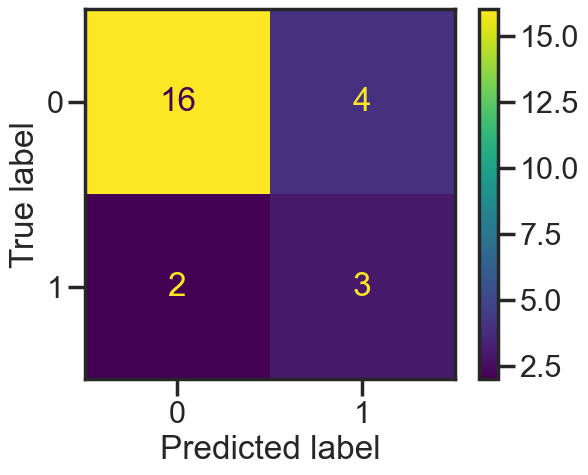

In [39]:
_= ConfusionMatrixDisplay(confusion_matrix(Y_test,predicted)).plot()

In [40]:
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.43      0.60      0.50         5

    accuracy                           0.76        25
   macro avg       0.66      0.70      0.67        25
weighted avg       0.80      0.76      0.77        25



In [41]:
balanced_accuracy_score(Y_test, predicted)

0.7

In [42]:
accuracy_score(Y_test, predicted)

0.76

In [43]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, predicted_probablities)

In [44]:
# Calculate AUC
roc_auc = auc(fpr, tpr)

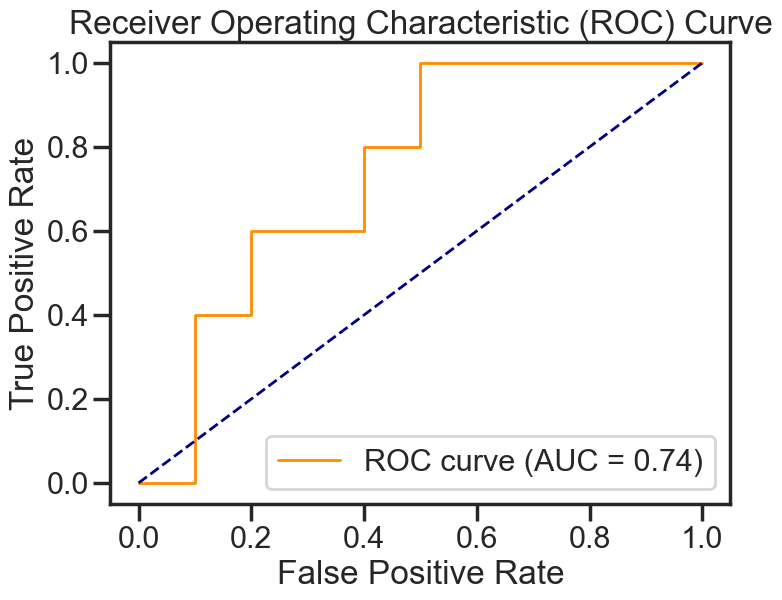

In [45]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Model 2 : Logistic Regression using sklearn : Implemeting GridsearchCV for Hyperparameter tuning

In [46]:
model2 = LogisticRegression()

In [47]:
model2.fit(X_train, Y_train)

LogisticRegression()

In [48]:
odds_cardiac_df = pd.DataFrame({'odds_ratio':(np.exp(model2.coef_).T).tolist(),'variable':X_train.columns.tolist()})
odds_cardiac_df['odds_ratio'] = odds_cardiac_df['odds_ratio'].str.get(0)
odds_cardiac_df.sort_values('odds_ratio', ascending=False)

,odds_ratio,variable
0,1.082796,age
1,1.047437,weight
3,0.950071,fitness_score
2,0.512781,gender


In [49]:
from sklearn.model_selection import GridSearchCV
# creating param dict for hyperparameter tuning
param_dict = {'C':  [0.001,0.01,0.1,1,10,100] , 'penalty': ['l1' , 'l2'], 'max_iter':[1000]}

In [50]:
#creating Grid model to perform grid search
grid_log_model = GridSearchCV(model2, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')

In [51]:
grid_log_model.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000], 'penalty': ['l1', 'l2']},
             scoring='recall', verbose=5)

In [52]:
grid_log_model.best_estimator_.coef_

array([[ 0.07371006,  0.0569482 , -0.0146136 , -0.02469128]])

In [53]:
odds_cardiac_df = pd.DataFrame({'odds_ratio':(np.exp(grid_log_model.best_estimator_.coef_).T).tolist(),'variable':X_train.columns.tolist()})
odds_cardiac_df['odds_ratio'] = odds_cardiac_df['odds_ratio'].str.get(0)
odds_cardiac_df.sort_values('odds_ratio', ascending=False)

,odds_ratio,variable
0,1.076495,age
1,1.058601,weight
2,0.985493,gender
3,0.975611,fitness_score


In [54]:
#geting the best Paramater of model
grid_log_model.best_params_

{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}

In [55]:
grid_log_predicted_model = grid_log_model.predict(X_test)

In [56]:
grid_log_predicted_model

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [57]:
print(classification_report(Y_test, grid_log_predicted_model))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.43      0.60      0.50         5

    accuracy                           0.76        25
   macro avg       0.66      0.70      0.67        25
weighted avg       0.80      0.76      0.77        25



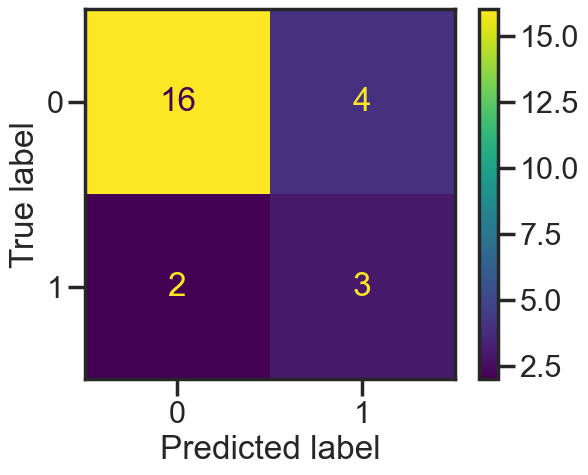

In [58]:
_ = ConfusionMatrixDisplay(confusion_matrix(Y_test, grid_log_predicted_model)).plot()

In [59]:
#Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, grid_log_predicted_model)

In [60]:
# Calculate AUC
roc_auc = auc(fpr, tpr)

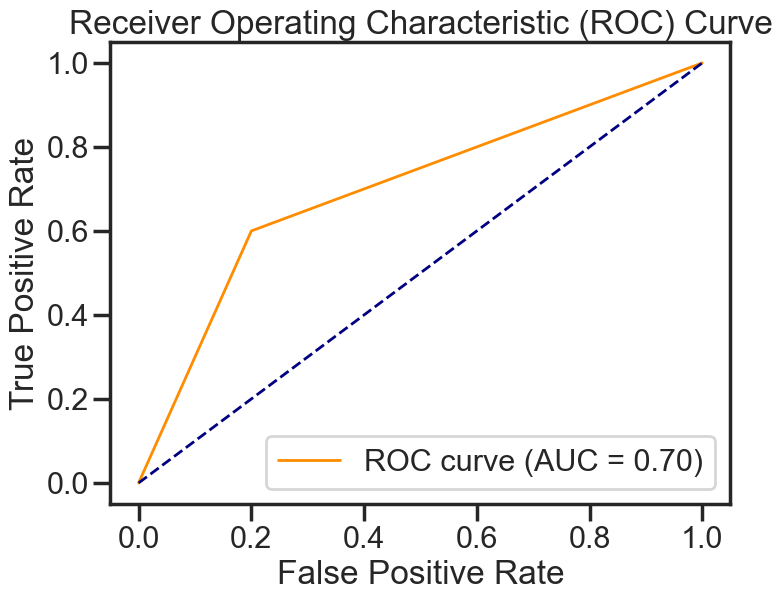

In [61]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()